In [16]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:

df_real=pd.read_csv("ytrain_NpxebDC.csv")
df_real.head(5)

/tmp/ipykernel_189396/740985834.py:1: DtypeWarning: Columns (1,3,5,11,20,49,52,54,55,56,64,70,71,94,95,101,102,114,129,131,132,133,138,139,152,157,163,174,180,184,193,196,201,207,208,219,220,228,241,245,250,256,258,264,265,269,270,271,272,273) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real=pd.read_csv("ytrain_NpxebDC.csv")


,timestamp,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,...,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
0,2019-11-25T00:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
1,2019-11-25T00:15:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
2,2019-11-25T00:30:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
3,2019-11-25T00:45:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
4,2019-11-25T01:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données (remplacez 'your_file.csv' par le chemin de votre fichier)
data = pd.read_csv('ytrain_NpxebDC.csv', parse_dates=['timestamp'])
# Vérifiez si la première colonne contient les dates (par défaut, souvent sans nom explicite)
data.rename(columns={data.columns[0]: 'timestamp'}, inplace=True)

# Convertir 'timestamp' en datetime et définir comme index
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
data.set_index('timestamp', inplace=True)

# Vérifiez que l'index est bien des dates
if not isinstance(data.index, pd.DatetimeIndex):
    raise ValueError("L'index du dataset doit être au format datetime")


/tmp/ipykernel_205262/191442301.py:6: DtypeWarning: Columns (1,3,5,11,20,49,52,54,55,56,64,70,71,94,95,101,102,114,129,131,132,133,138,139,152,157,163,174,180,184,193,196,201,207,208,219,220,228,241,245,250,256,258,264,265,269,270,271,272,273) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ytrain_NpxebDC.csv', parse_dates=['timestamp'])


/tmp/ipykernel_205262/2902659927.py:6: DtypeWarning: Columns (1,3,5,11,20,49,52,54,55,56,64,70,71,94,95,101,102,114,129,131,132,133,138,139,152,157,163,174,180,184,193,196,201,207,208,219,220,228,241,245,250,256,258,264,265,269,270,271,272,273) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ytrain_NpxebDC.csv', parse_dates=['timestamp'])


KeyboardInterrupt: 

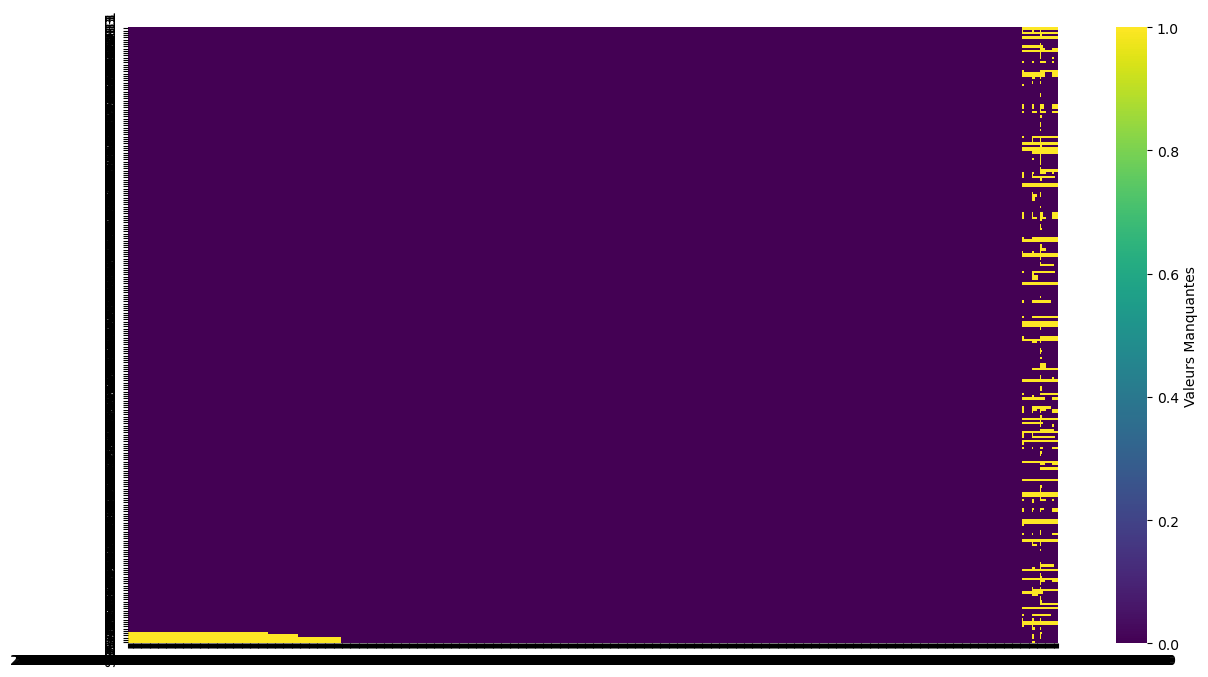

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données (remplacez 'your_file.csv' par le chemin de votre fichier)
data = pd.read_csv('ytrain_NpxebDC.csv', parse_dates=['timestamp'])

# Définir la colonne 'timestamp' comme index
data.set_index('timestamp', inplace=True)

# Vérifiez que l'index est bien des dates
if not isinstance(data.index, pd.DatetimeIndex):
    raise ValueError("L'index du dataset doit être au format datetime")

# Calcul des valeurs manquantes par date et par station
missing_data = data.isnull()

# Créer une heatmap des valeurs manquantes
plt.figure(figsize=(15, 8))
sns.heatmap(missing_data.T, cmap="viridis", cbar_kws={'label': 'Valeurs Manquantes'}, xticklabels=30, yticklabels=True)
plt.title('Carte thermique des valeurs manquantes par station et date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()


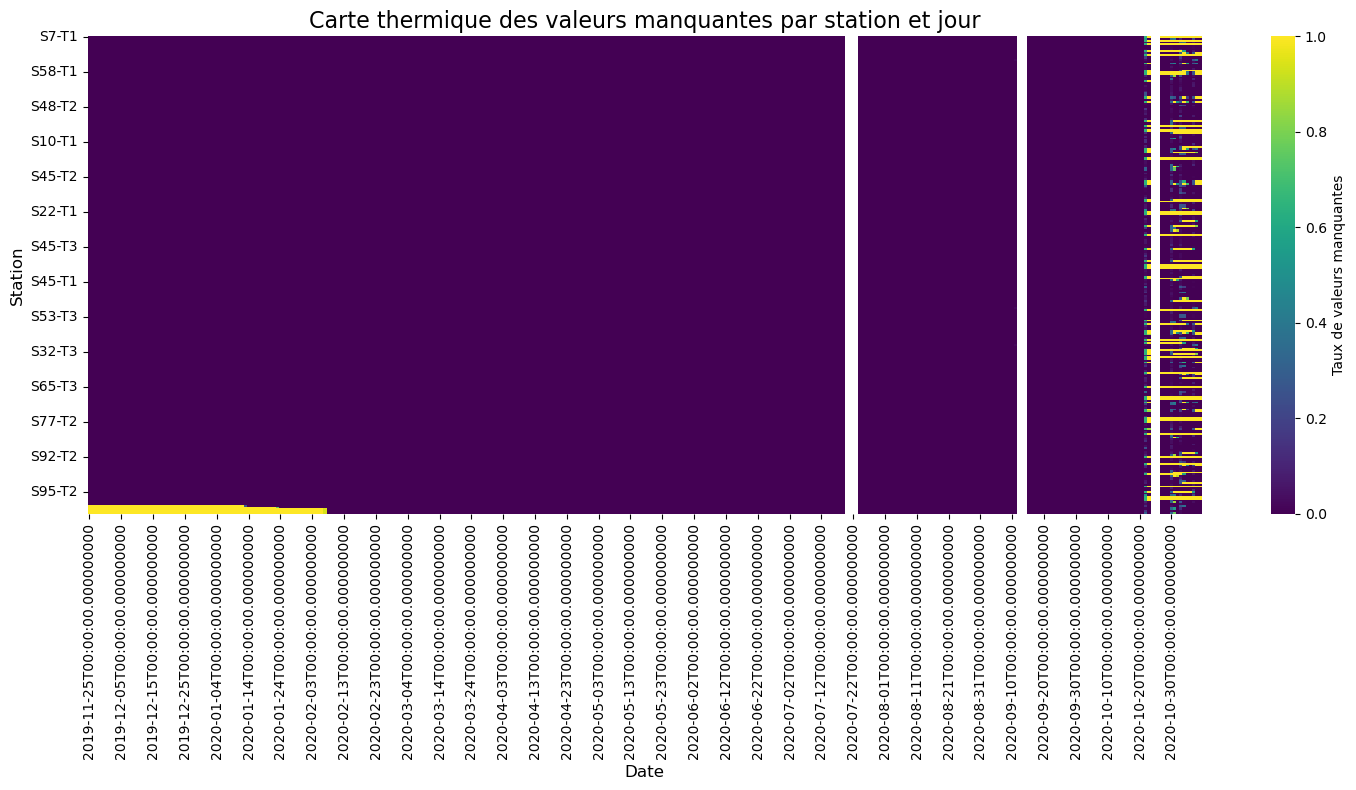

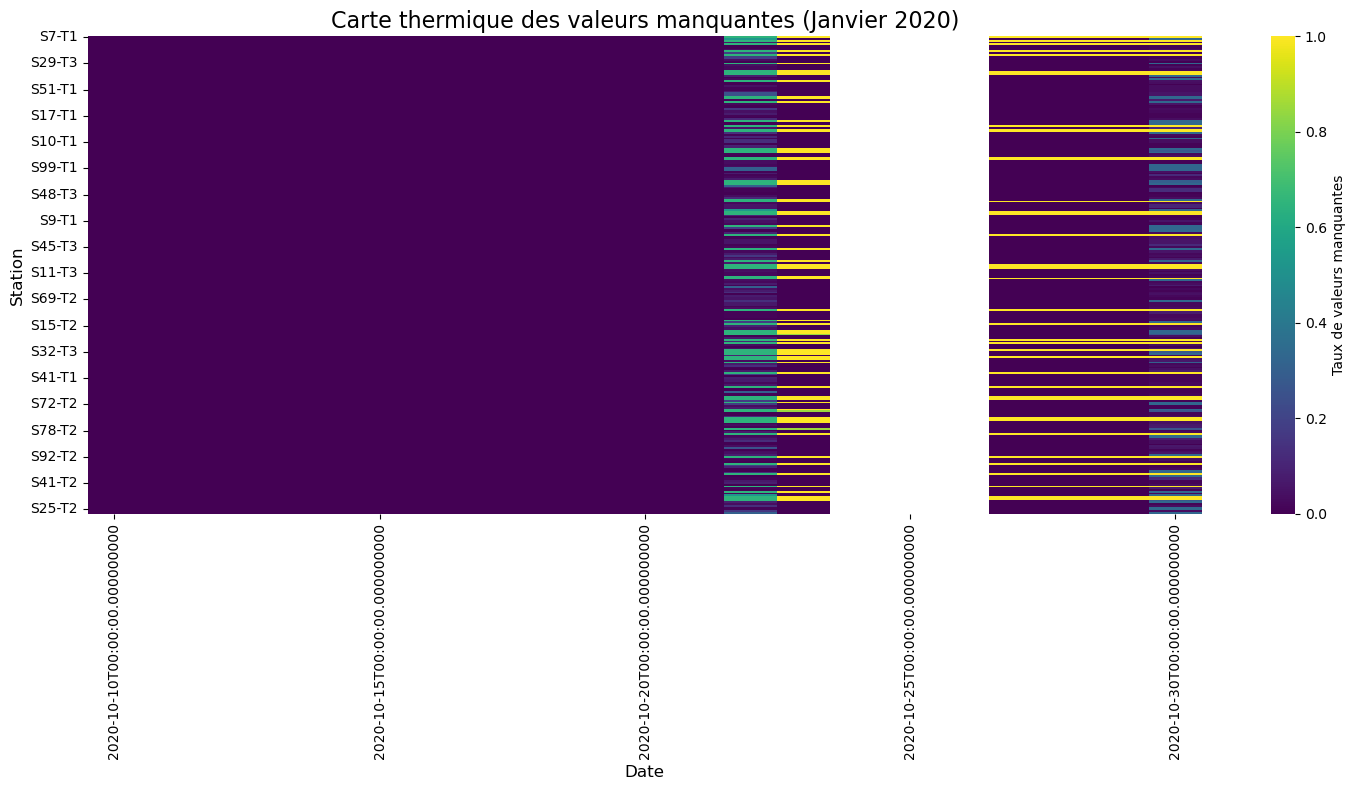

In [ ]:


# Simplification : Grouper par jour (moyenne des valeurs manquantes par jour)
daily_missing = data.resample('D').apply(lambda x: x.isnull().mean())

# Créer une heatmap des valeurs manquantes par jour et par station
plt.figure(figsize=(15, 8))
sns.heatmap(daily_missing.T, cmap="viridis", cbar_kws={'label': 'Taux de valeurs manquantes'}, xticklabels=10, yticklabels=20)
plt.title('Carte thermique des valeurs manquantes par station et jour', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Option : Zoomer sur une période spécifique (par exemple : Janvier 2020)




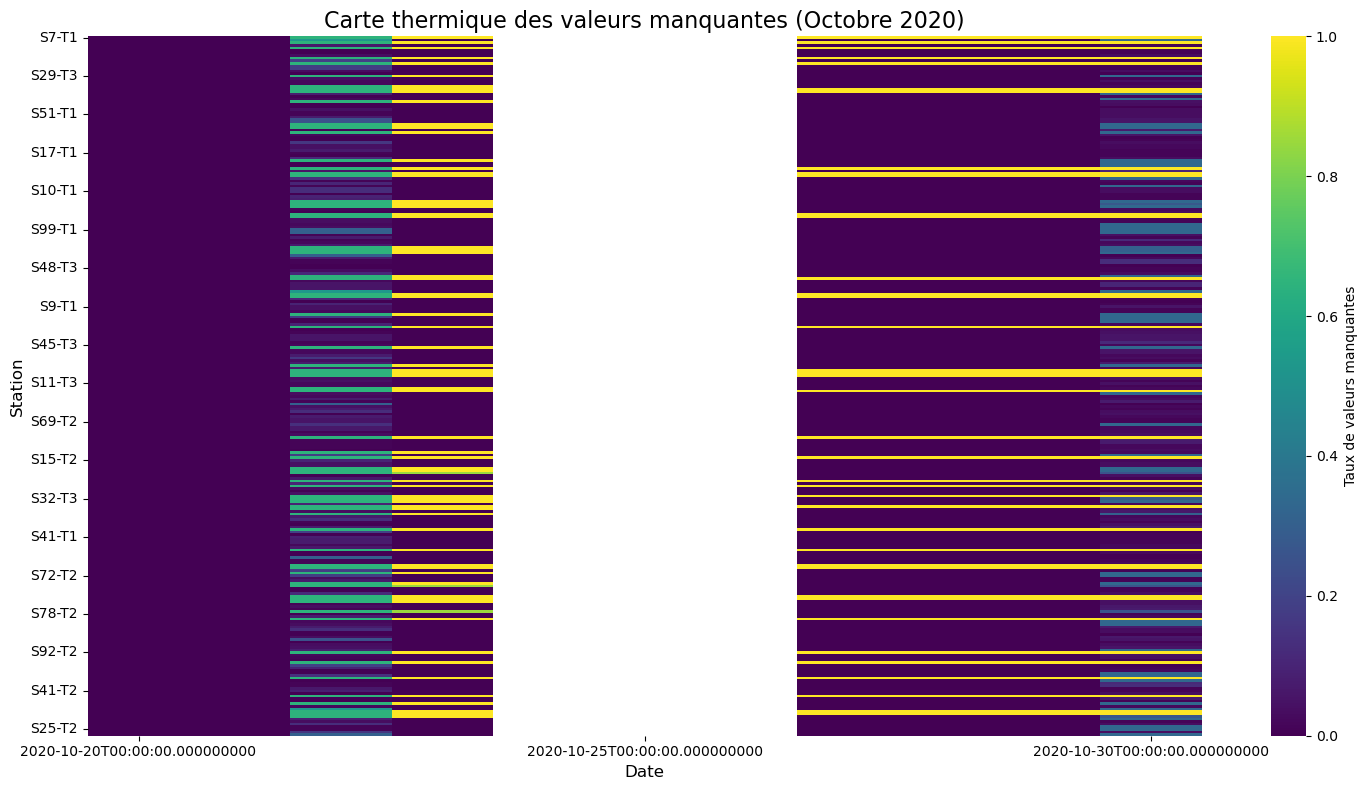

In [13]:
subset = daily_missing.loc['2020-10-20':'2020-10-30']
plt.figure(figsize=(15, 8))
sns.heatmap(subset.T, cmap="viridis", cbar_kws={'label': 'Taux de valeurs manquantes'}, xticklabels=5, yticklabels=15)
plt.title('Carte thermique des valeurs manquantes (Octobre 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_205262/1635072280.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  status_data = data.replace({'Down': 1, 'Offline': 0, 'Available': -1, 'Charging': 2, 'Passive': 3})  # Ajout de Charging et Passive


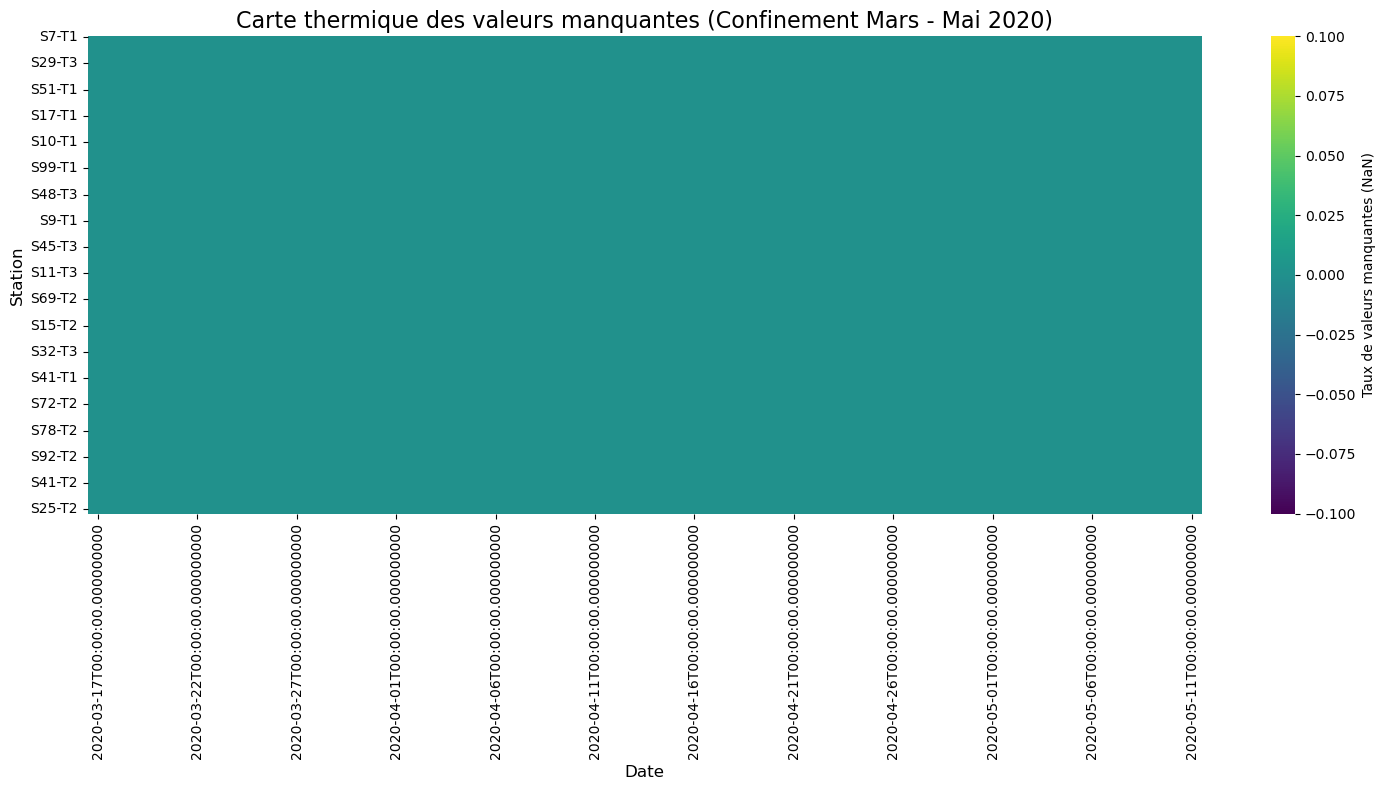

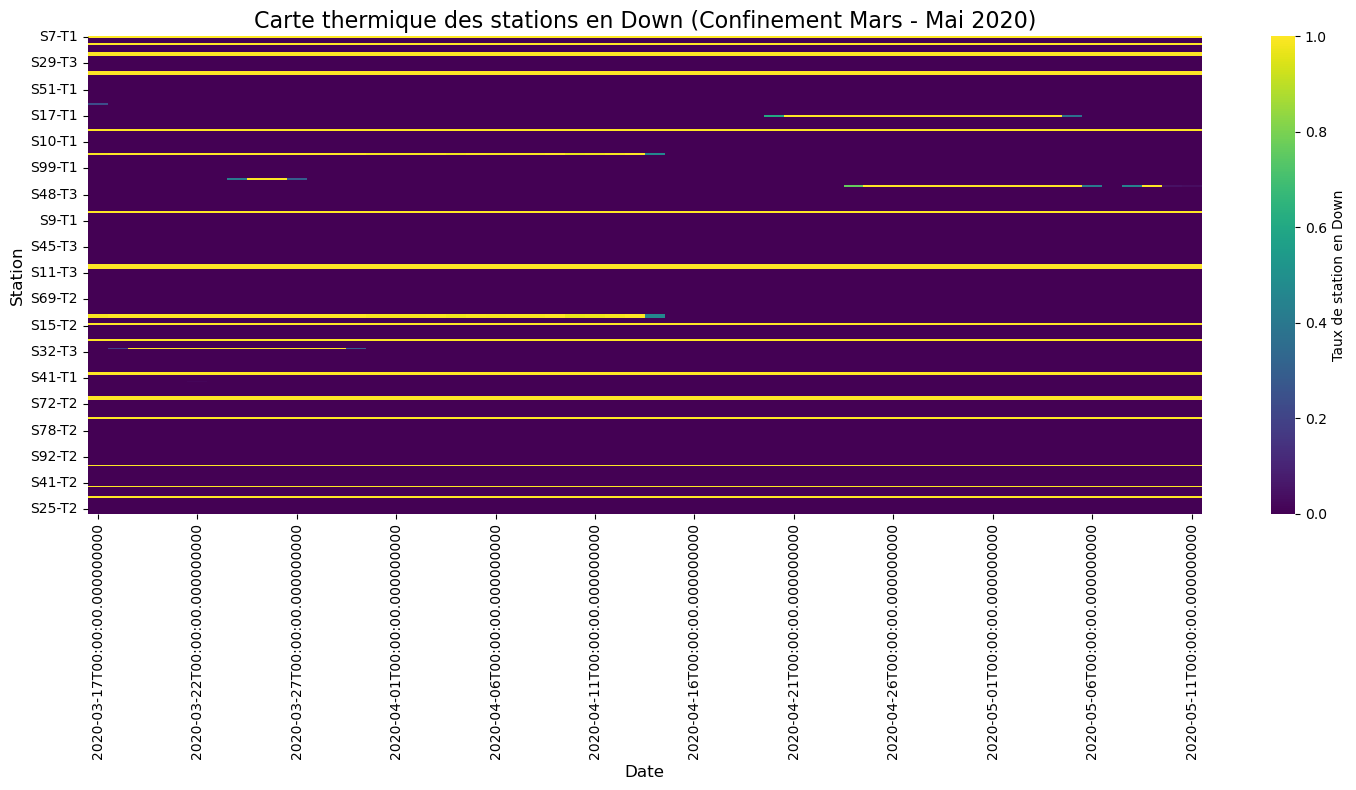

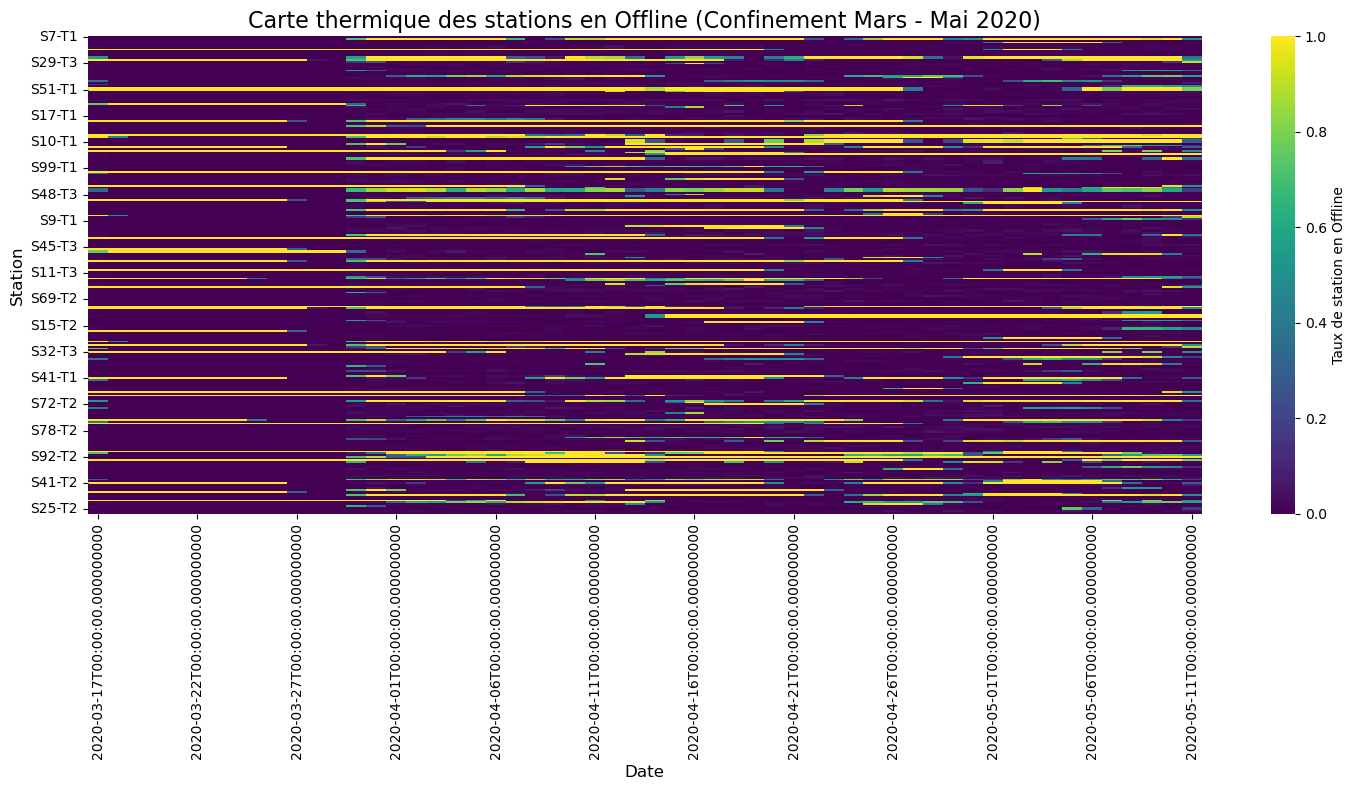

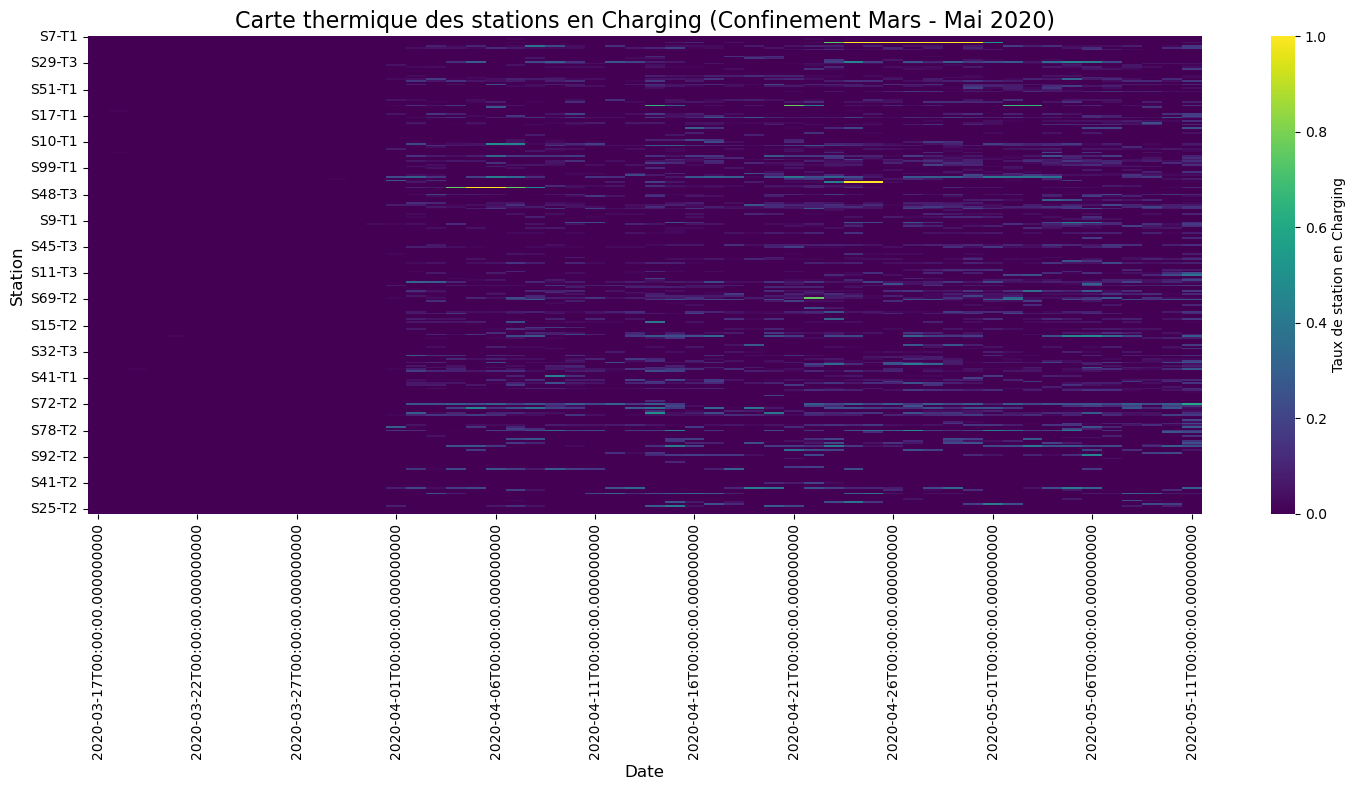

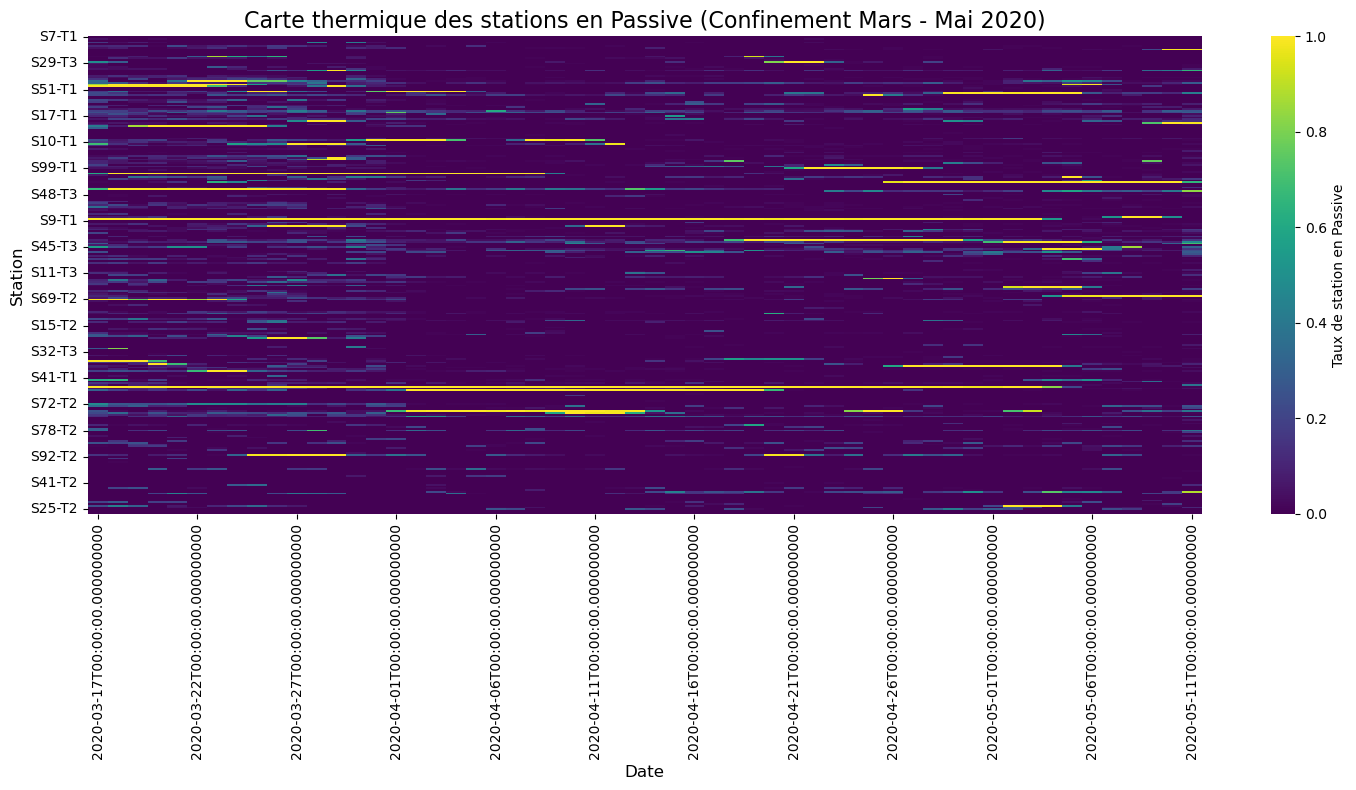

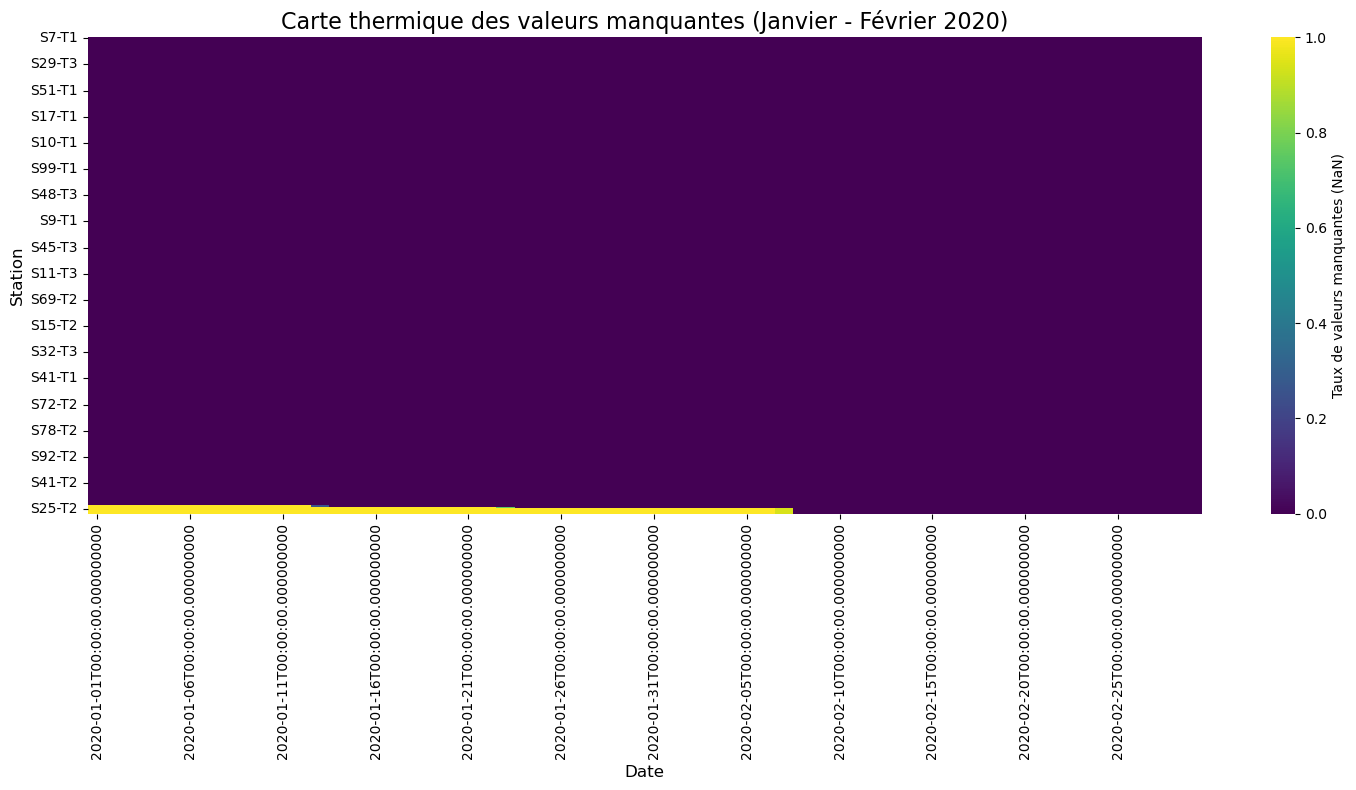

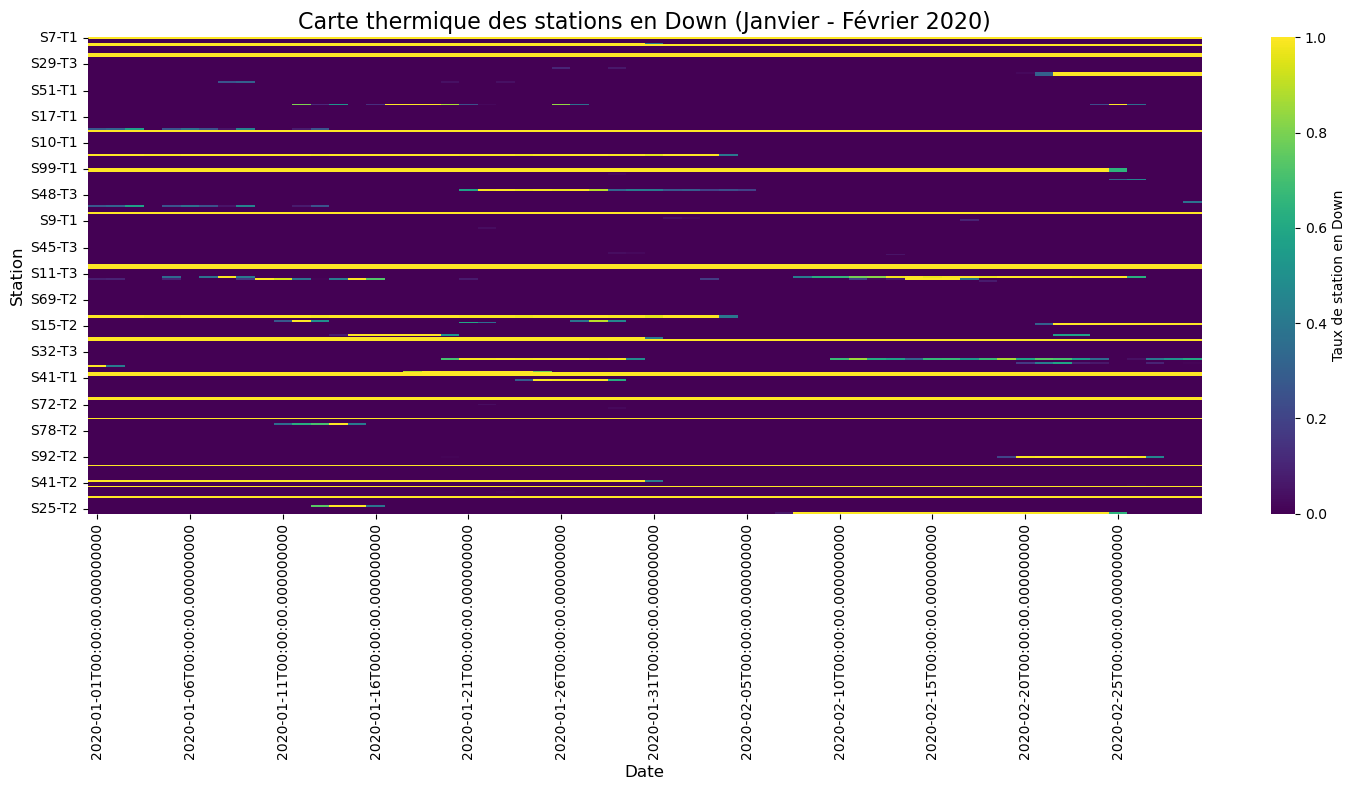

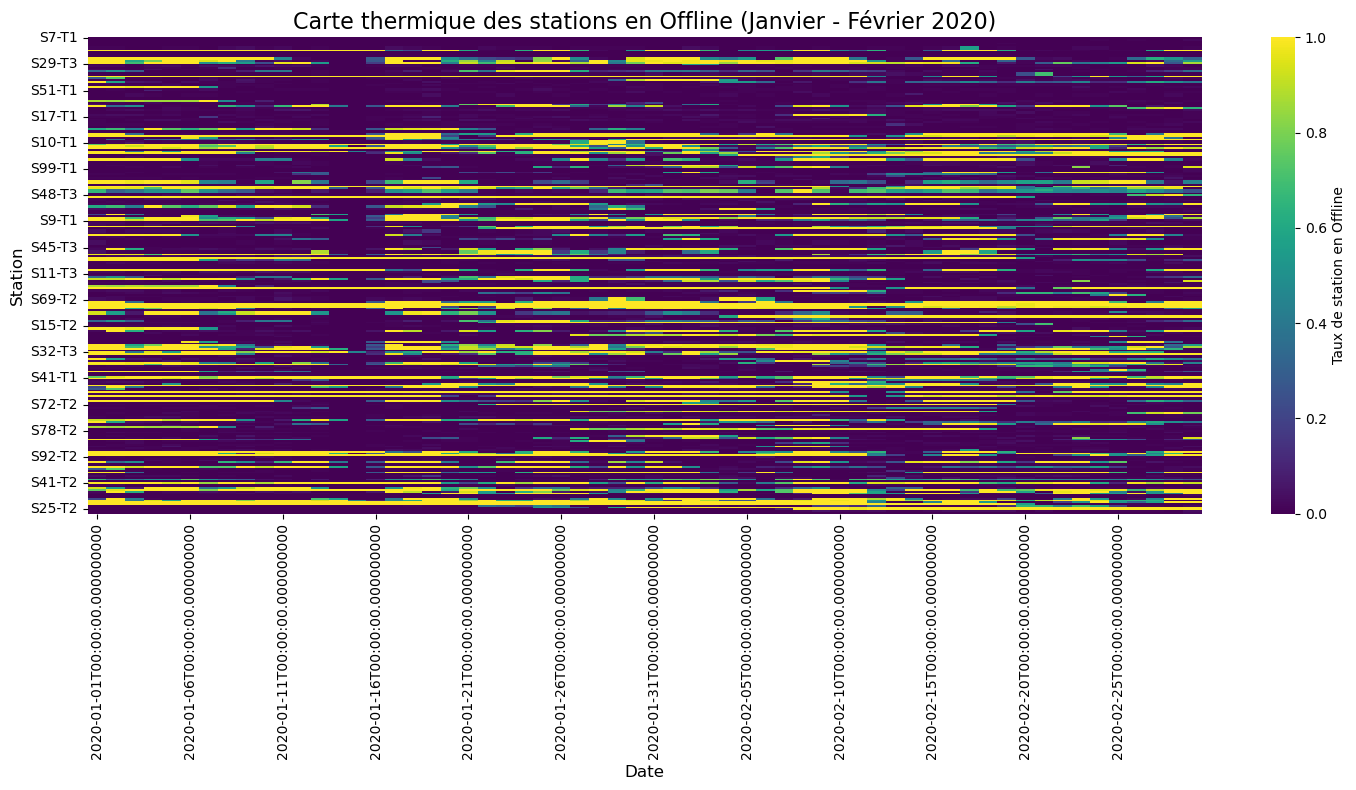

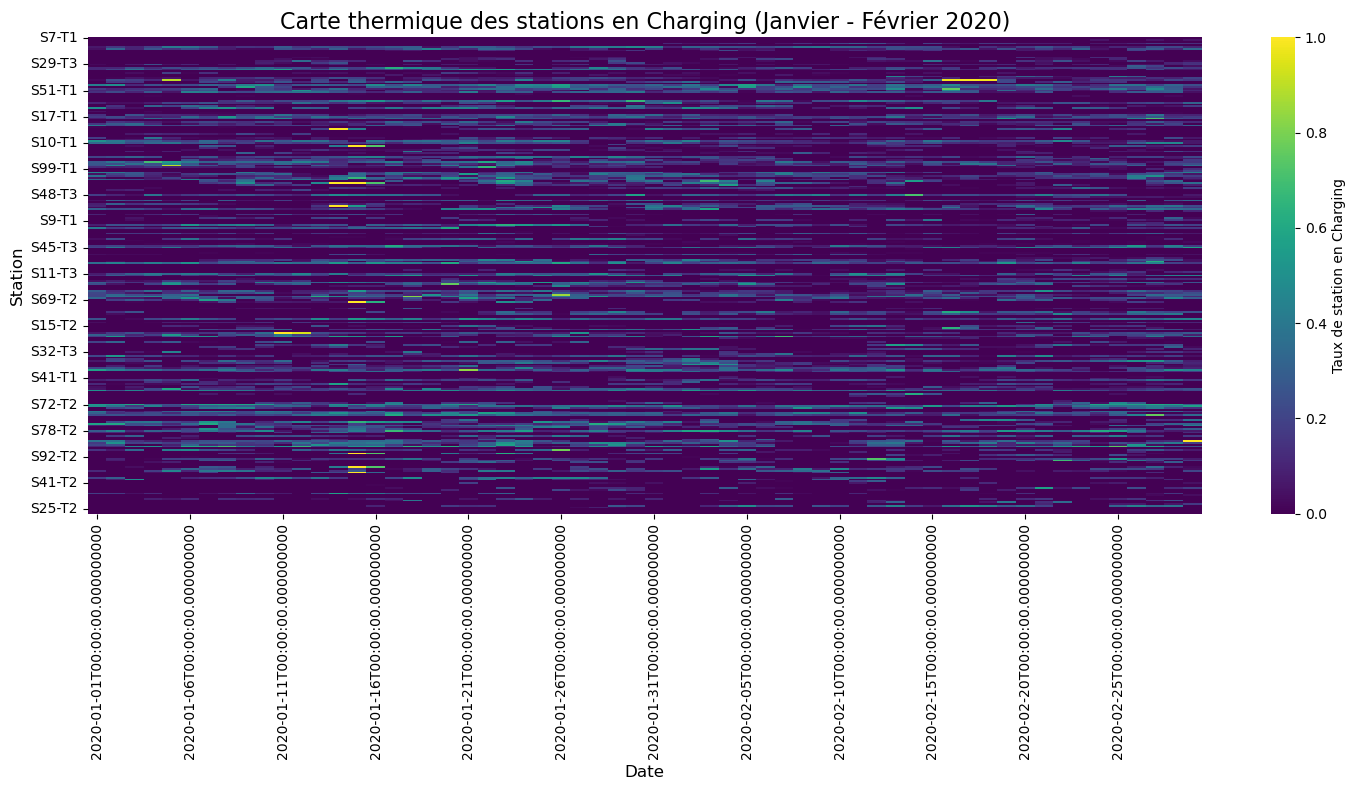

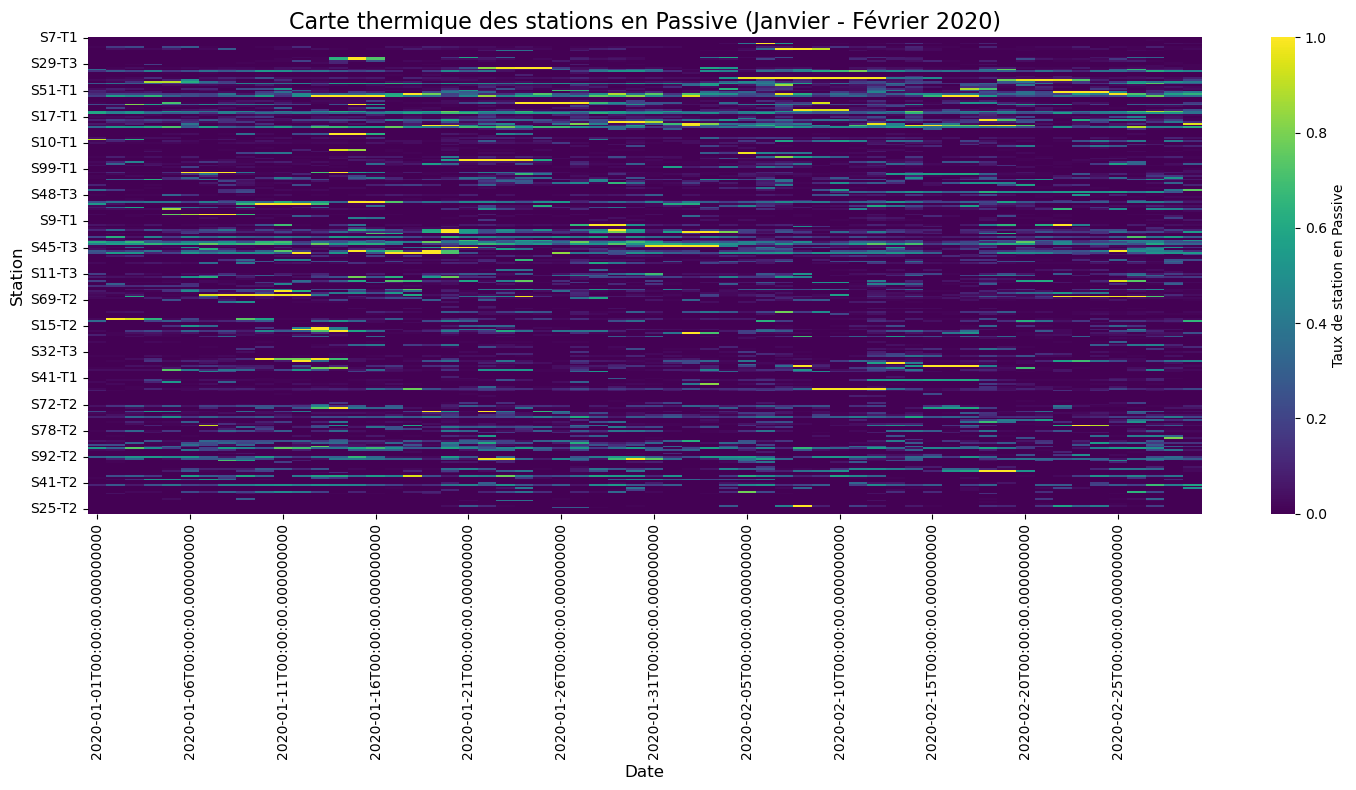

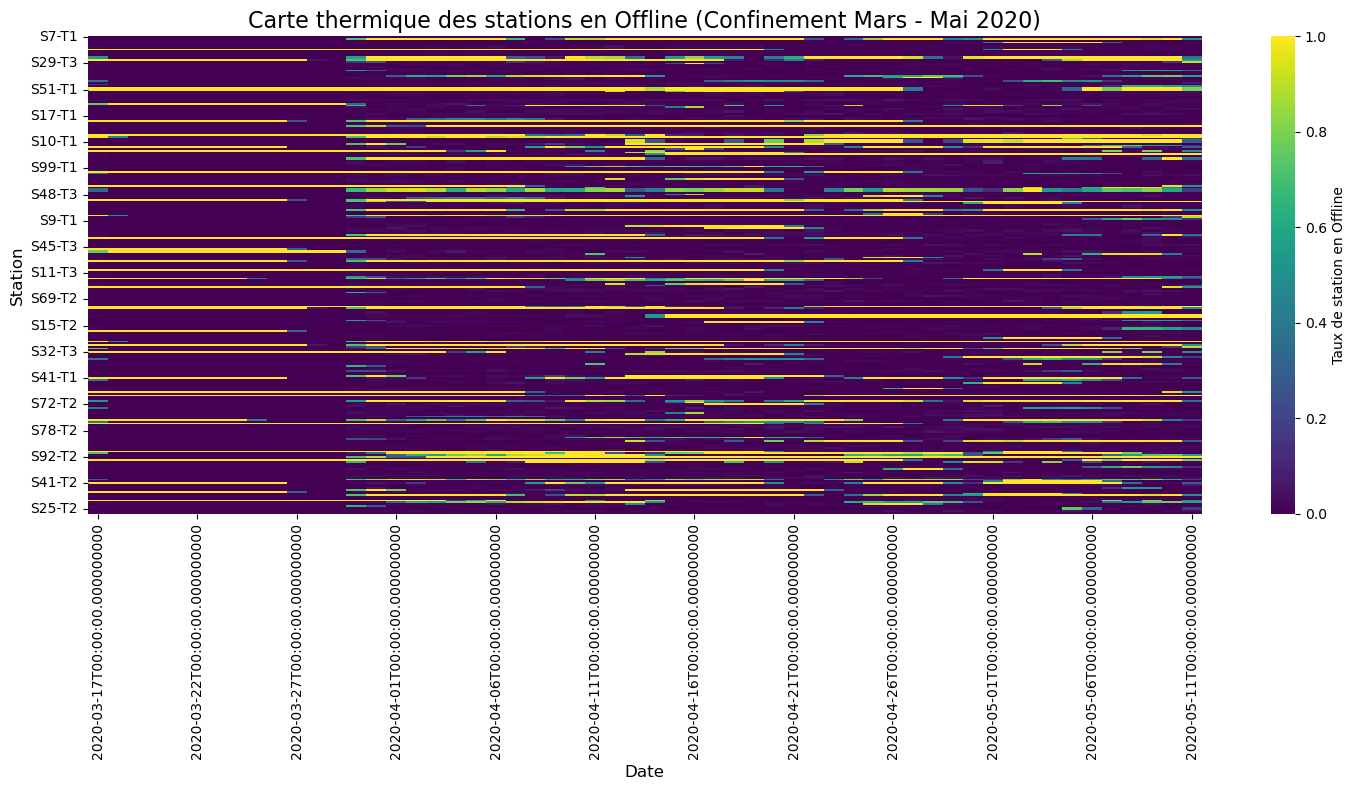

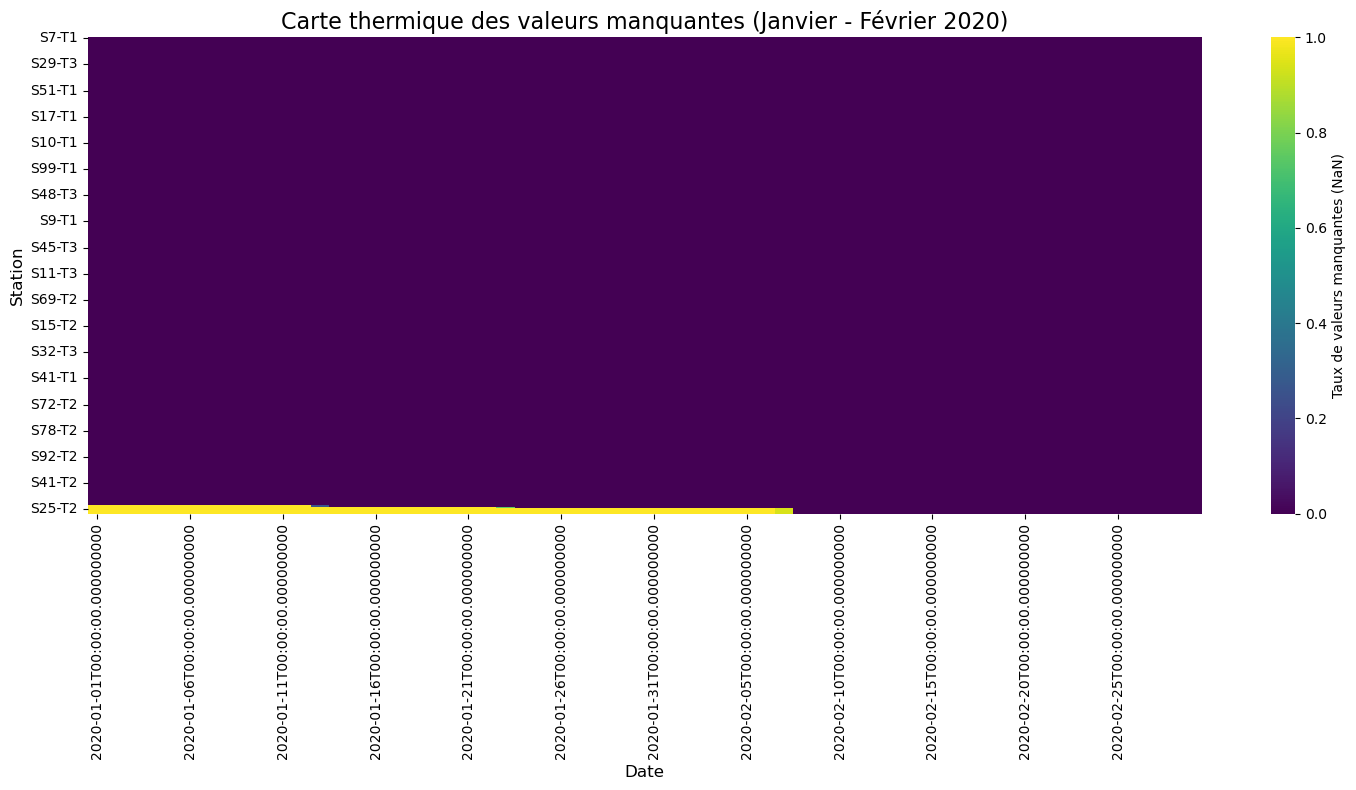

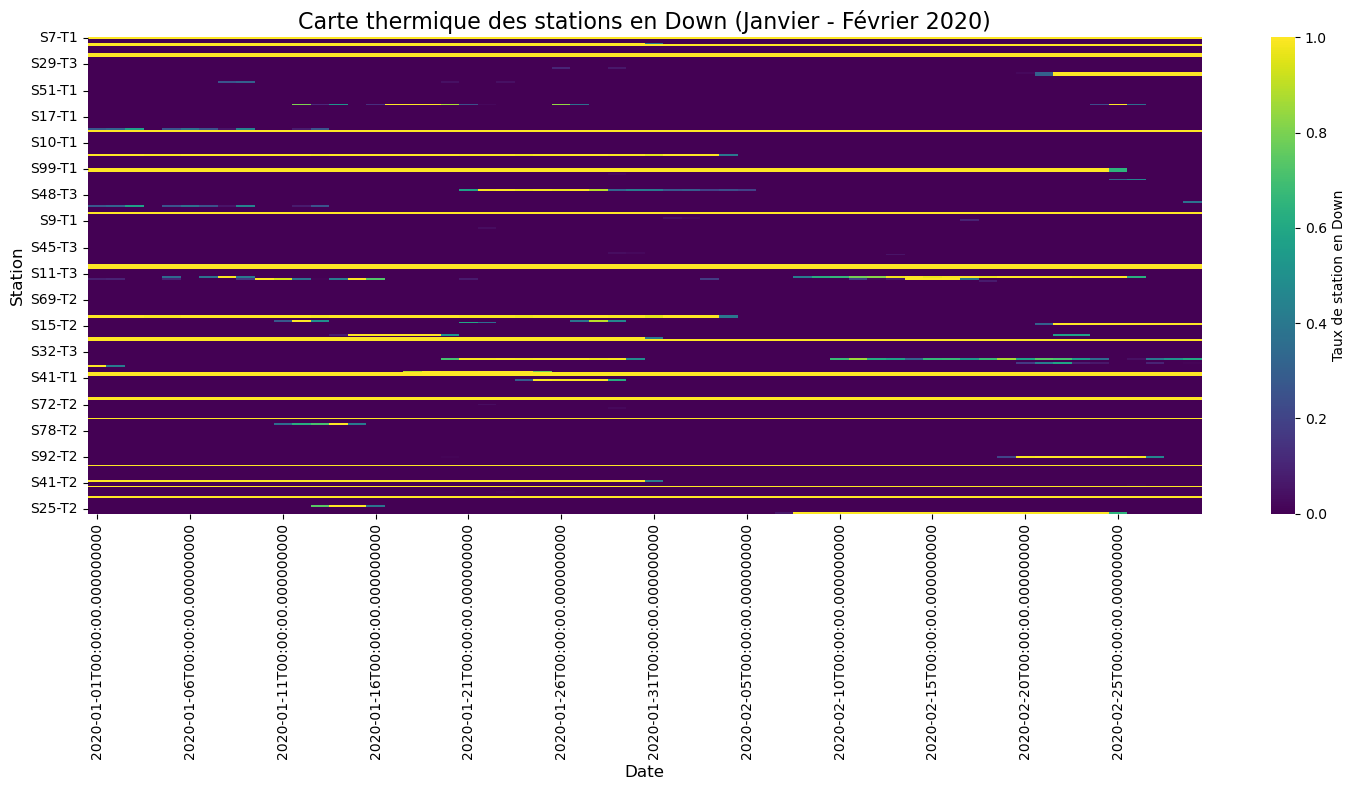

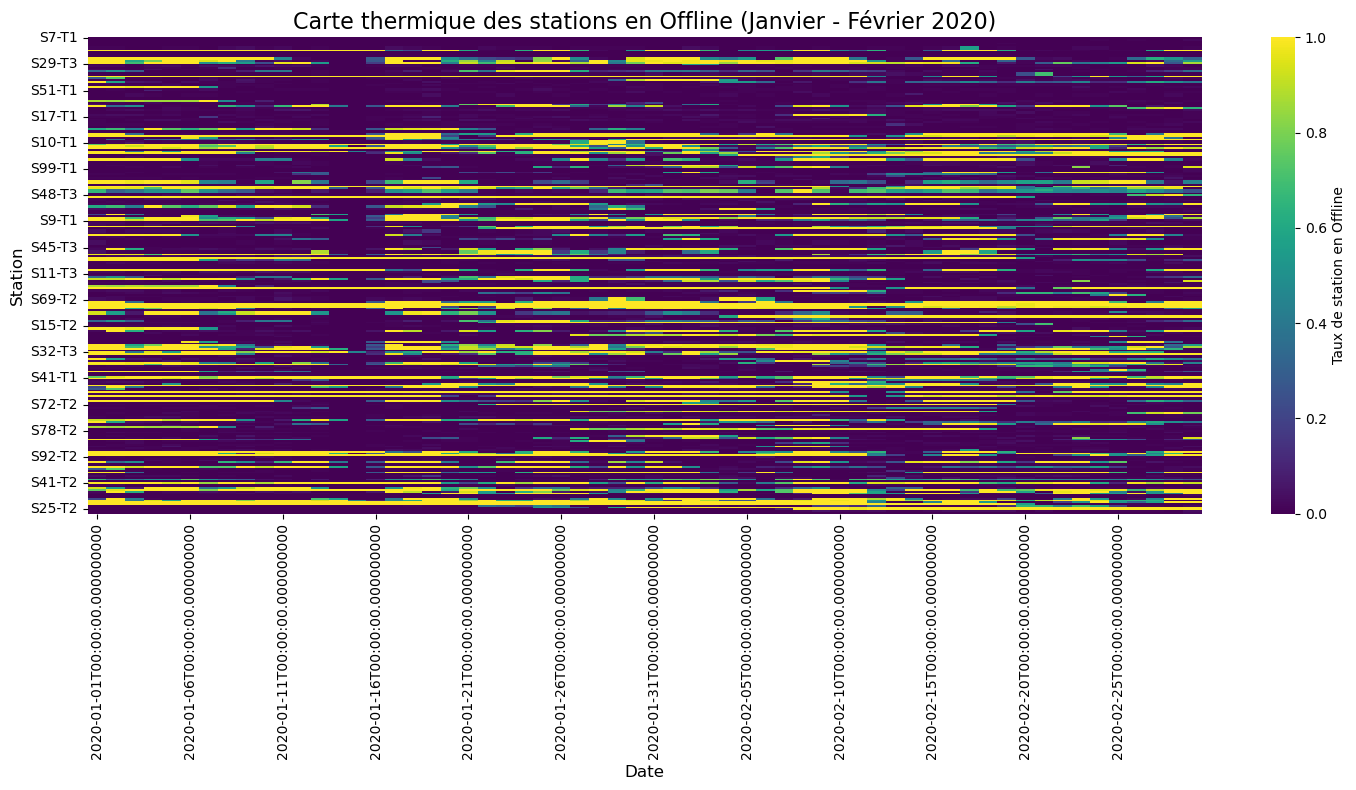

In [22]:


# Remplacer les statuts par des valeurs numériques (et conserver NaN pour les valeurs manquantes)
status_data = data.replace({'Down': 1, 'Offline': 0, 'Available': -1, 'Charging': 2, 'Passive': 3})  # Ajout de Charging et Passive

# Gérer les NaN - les laisser comme NaN pour l'analyse
# Grouper les données par jour et calculer la proportion de NaN, Down, Charging, Passive
daily_status = status_data.resample('D').apply(lambda x: x.isnull().mean())  # Pour les NaN
daily_down = status_data.resample('D').apply(lambda x: (x == 1).mean())  # Pour les statuts "Down"
daily_offline = status_data.resample('D').apply(lambda x: (x == 0).mean())  # Pour les statuts "Offline"
daily_charging = status_data.resample('D').apply(lambda x: (x == 2).mean())  # Pour les statuts "Charging"
daily_passive = status_data.resample('D').apply(lambda x: (x == 3).mean())  # Pour les statuts "Passive"

# Période de confinement (17 mars 2020 - 11 mai 2020)
confinement_period = daily_status.loc['2020-03-17':'2020-05-11']
confinement_down = daily_down.loc['2020-03-17':'2020-05-11']
confinement_offline = daily_offline.loc['2020-03-17':'2020-05-11']
confinement_charging = daily_charging.loc['2020-03-17':'2020-05-11']
confinement_passive = daily_passive.loc['2020-03-17':'2020-05-11']

# Période sans confinement (par exemple janvier et février 2020)
no_confinement_period = daily_status.loc['2020-01-01':'2020-02-29']
no_confinement_down = daily_down.loc['2020-01-01':'2020-02-29']
no_confinement_offline = daily_offline.loc['2020-01-01':'2020-02-29']
no_confinement_charging = daily_charging.loc['2020-01-01':'2020-02-29']
no_confinement_passive = daily_passive.loc['2020-01-01':'2020-02-29']

# Créer une heatmap pour les valeurs manquantes (NaN) pendant le confinement
plt.figure(figsize=(15, 8))
sns.heatmap(confinement_period.T, cmap="viridis", cbar_kws={'label': 'Taux de valeurs manquantes (NaN)'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des valeurs manquantes (Confinement Mars - Mai 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Down" pendant le confinement
plt.figure(figsize=(15, 8))
sns.heatmap(confinement_down.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Down'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Down (Confinement Mars - Mai 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Offline" pendant le confinement
plt.figure(figsize=(15, 8))
sns.heatmap(confinement_offline.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Offline'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Offline (Confinement Mars - Mai 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Charging" pendant le confinement
plt.figure(figsize=(15, 8))
sns.heatmap(confinement_charging.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Charging'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Charging (Confinement Mars - Mai 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Passive" pendant le confinement
plt.figure(figsize=(15, 8))
sns.heatmap(confinement_passive.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Passive'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Passive (Confinement Mars - Mai 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les valeurs manquantes (NaN) avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_period.T, cmap="viridis", cbar_kws={'label': 'Taux de valeurs manquantes (NaN)'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des valeurs manquantes (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Down" avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_down.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Down'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Down (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Offline" avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_offline.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Offline'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Offline (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Charging" avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_charging.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Charging'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Charging (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Passive" avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_passive.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Passive'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Passive (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()


# Créer une heatmap pour les statuts "Offline" pendant le confinement
plt.figure(figsize=(15, 8))
sns.heatmap(confinement_offline.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Offline'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Offline (Confinement Mars - Mai 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les valeurs manquantes (NaN) avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_period.T, cmap="viridis", cbar_kws={'label': 'Taux de valeurs manquantes (NaN)'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des valeurs manquantes (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Down" avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_down.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Down'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Down (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Créer une heatmap pour les statuts "Offline" avant le confinement (Janvier - Février 2020)
plt.figure(figsize=(15, 8))
sns.heatmap(no_confinement_offline.T, cmap="viridis", cbar_kws={'label': 'Taux de station en Offline'}, 
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des stations en Offline (Janvier - Février 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()


Observation traffic